In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

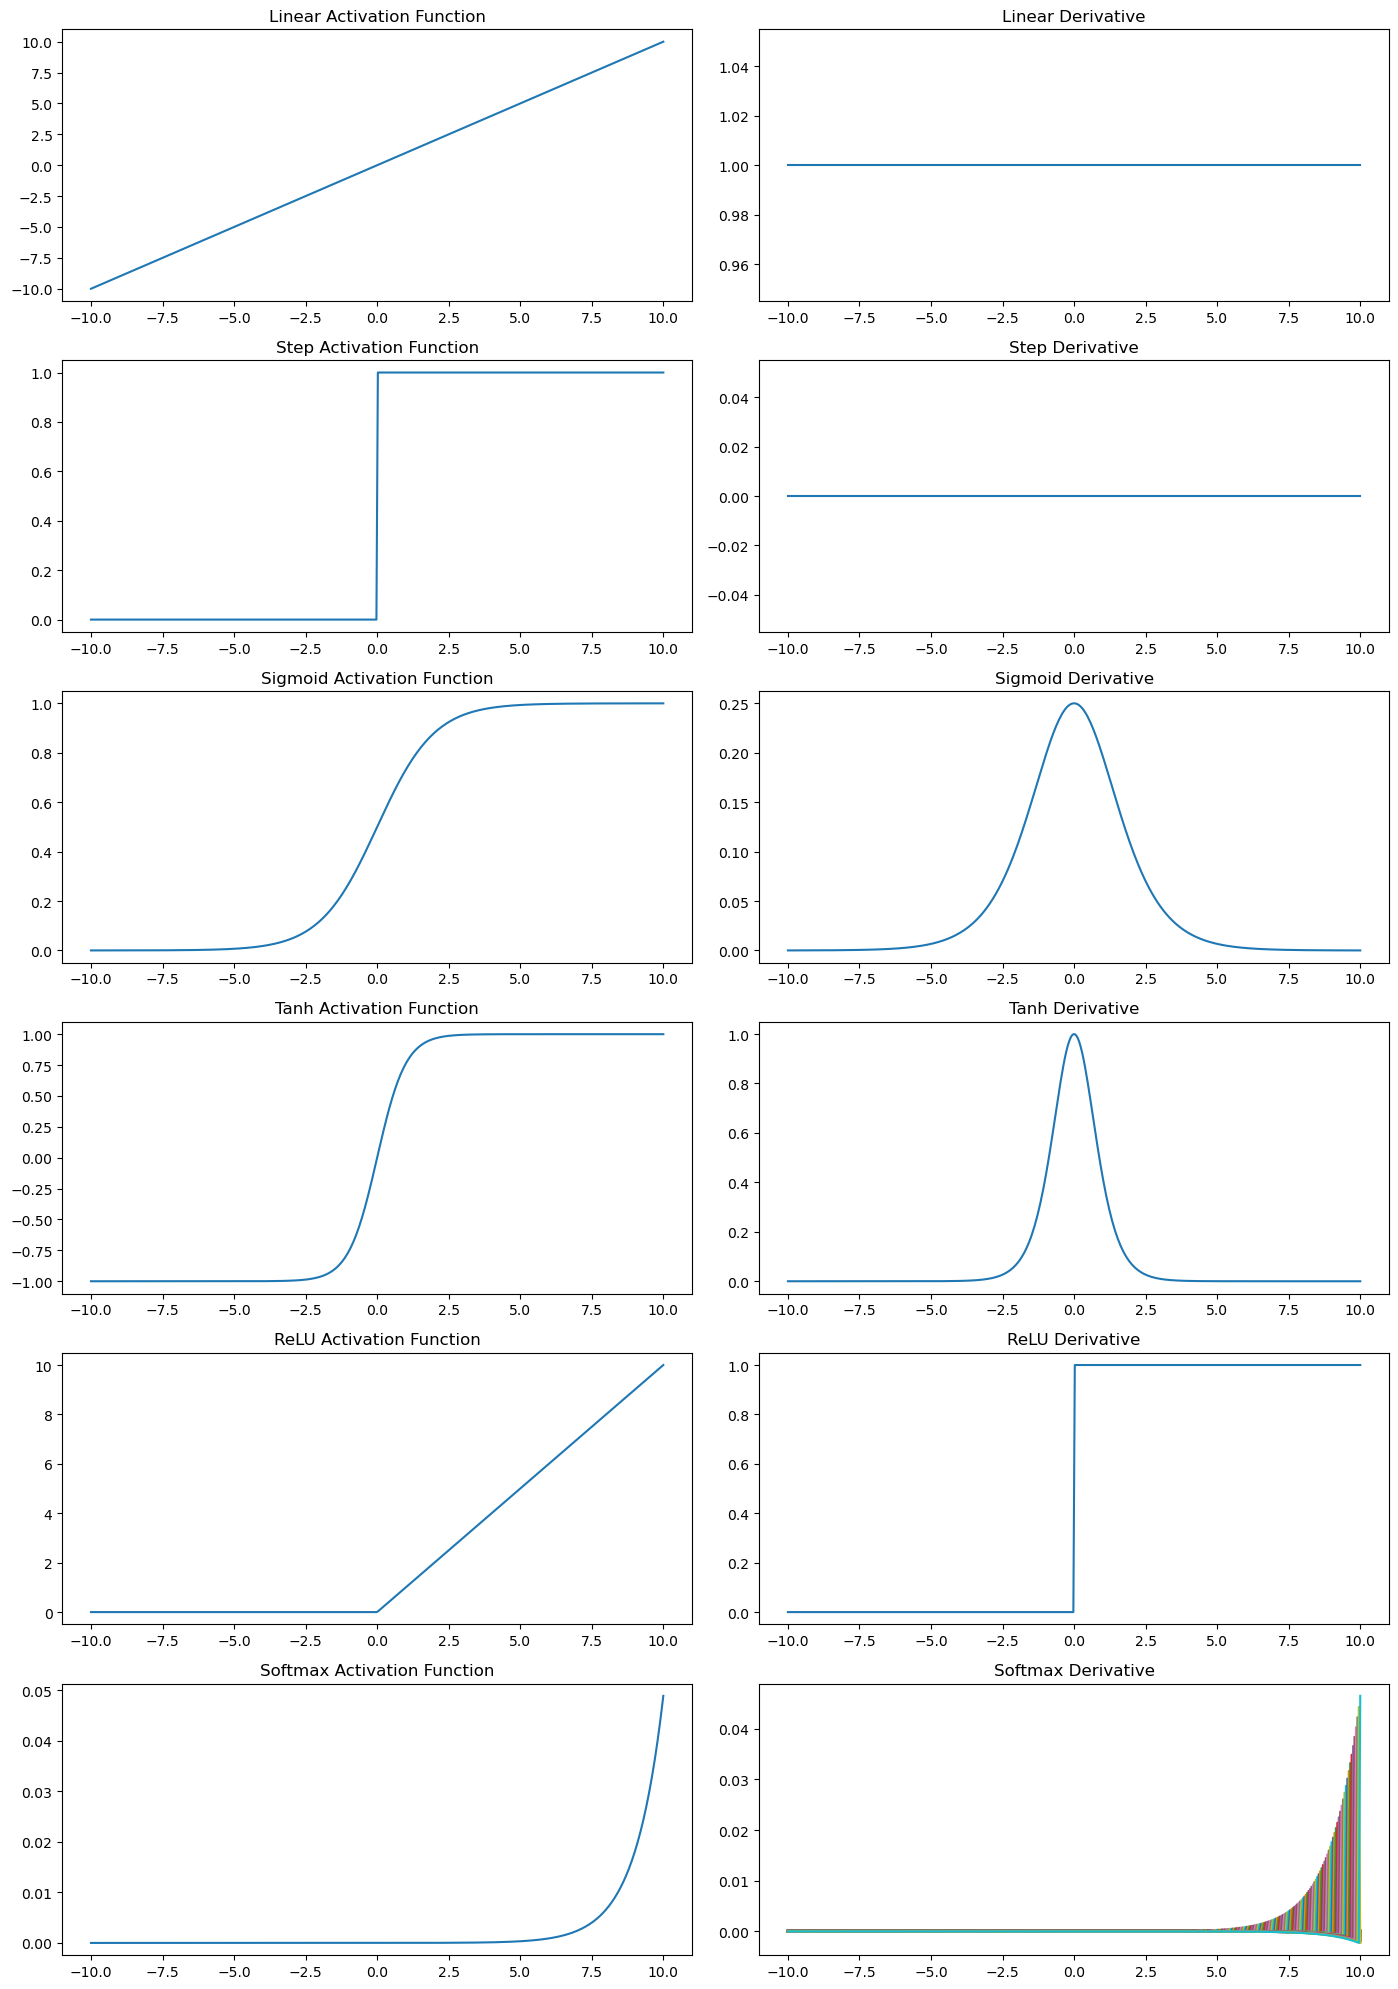

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def linear(x):
    return x

def step(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # for numerical stability
    return exp_x / exp_x.sum(axis=0)

# Derivatives of activation functions
def linear_derivative(x):
    return np.ones_like(x)

def step_derivative(x):
    return np.zeros_like(x)  # technically undefined at x=0

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax_derivative(x):
    s = softmax(x).reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)  # Jacobian matrix

# Generate input values
x = np.linspace(-10, 10, 400)

# Calculate activation values
linear_values = linear(x)
step_values = step(x)
sigmoid_values = sigmoid(x)
tanh_values = tanh(x)
relu_values = relu(x)
softmax_values = softmax(x)

# Calculate derivatives
linear_deriv = linear_derivative(x)
step_deriv = step_derivative(x)
sigmoid_deriv = sigmoid_derivative(x)
tanh_deriv = tanh_derivative(x)
relu_deriv = relu_derivative(x)
softmax_deriv = softmax_derivative(x)

# Plotting
fig, axs = plt.subplots(6, 2, figsize=(14, 20))

# Plot activation functions
axs[0, 0].plot(x, linear_values)
axs[0, 0].set_title('Linear Activation Function')

axs[1, 0].plot(x, step_values)
axs[1, 0].set_title('Step Activation Function')

axs[2, 0].plot(x, sigmoid_values)
axs[2, 0].set_title('Sigmoid Activation Function')

axs[3, 0].plot(x, tanh_values)
axs[3, 0].set_title('Tanh Activation Function')

axs[4, 0].plot(x, relu_values)
axs[4, 0].set_title('ReLU Activation Function')

axs[5, 0].plot(x, softmax_values)
axs[5, 0].set_title('Softmax Activation Function')

# Plot derivatives
axs[0, 1].plot(x, linear_deriv)
axs[0, 1].set_title('Linear Derivative')

axs[1, 1].plot(x, step_deriv)
axs[1, 1].set_title('Step Derivative')

axs[2, 1].plot(x, sigmoid_deriv)
axs[2, 1].set_title('Sigmoid Derivative')

axs[3, 1].plot(x, tanh_deriv)
axs[3, 1].set_title('Tanh Derivative')

axs[4, 1].plot(x, relu_deriv)
axs[4, 1].set_title('ReLU Derivative')

axs[5, 1].plot(x, softmax_deriv)
axs[5, 1].set_title('Softmax Derivative')

plt.tight_layout()
plt.show()

In [7]:
import numpy as np

class SimpleNeuralNetwork:
    def __init__(self):
        # Initialize weights and biases
        self.w1 = np.random.randn()
        self.b1 = np.random.randn()
        self.w2 = np.random.randn()
        self.b2 = np.random.randn()

    def sin(self, x):
        return np.sin(x)

    def sin_derivative(self, x):
        return np.cos(x)

    def forward(self, x):
        self.z1 = self.w1 * x + self.b1
        self.a1 = self.sin(self.z1)
        self.z2 = self.w2 * self.a1 + self.b2
        self.y_pred = self.sin(self.z2)
        return self.y_pred

    def loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def backward(self, x, y_true, y_pred):
        # Compute gradients
        d_loss_d_y_pred = -2 * (y_true - y_pred)

        d_y_pred_d_z2 = self.sin_derivative(self.z2)
        d_z2_d_w2 = self.a1
        d_z2_d_b2 = 1
        d_z2_d_a1 = self.w2

        d_a1_d_z1 = self.sin_derivative(self.z1)
        d_z1_d_w1 = x
        d_z1_d_b1 = 1

        # Backpropagation
        d_loss_d_w2 = d_loss_d_y_pred * d_y_pred_d_z2 * d_z2_d_w2
        d_loss_d_b2 = d_loss_d_y_pred * d_y_pred_d_z2 * d_z2_d_b2

        d_loss_d_a1 = d_loss_d_y_pred * d_y_pred_d_z2 * d_z2_d_a1
        d_loss_d_w1 = d_loss_d_a1 * d_a1_d_z1 * d_z1_d_w1
        d_loss_d_b1 = d_loss_d_a1 * d_a1_d_z1 * d_z1_d_b1

        return d_loss_d_w1, d_loss_d_b1, d_loss_d_w2, d_loss_d_b2

    def update_weights(self, d_loss_d_w1, d_loss_d_b1, d_loss_d_w2, d_loss_d_b2, learning_rate):
        self.w1 -= learning_rate * d_loss_d_w1
        self.b1 -= learning_rate * d_loss_d_b1
        self.w2 -= learning_rate * d_loss_d_w2
        self.b2 -= learning_rate * d_loss_d_b2

    def train(self, x, y_true, learning_rate, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(x)
            loss = self.loss(y_true, y_pred)
            d_loss_d_w1, d_loss_d_b1, d_loss_d_w2, d_loss_d_b2 = self.backward(x, y_true, y_pred)
            self.update_weights(d_loss_d_w1, d_loss_d_b1, d_loss_d_w2, d_loss_d_b2, learning_rate)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

# Example usage
nn = SimpleNeuralNetwork()
x = np.array([0.5])
y_true = np.array([0.8])
learning_rate = 0.01
epochs = 1000

nn.train(x, y_true, learning_rate, epochs)

Epoch 0, Loss: 4.349582373530719e-05
Epoch 100, Loss: 6.966367630732847e-06
Epoch 200, Loss: 1.0916500725144057e-06
Epoch 300, Loss: 1.6957959946256338e-07
Epoch 400, Loss: 2.6252214709843916e-08
Epoch 500, Loss: 4.058524265336989e-09
Epoch 600, Loss: 6.2710199403422e-10
Epoch 700, Loss: 9.687616470435444e-11
Epoch 800, Loss: 1.4964417359499667e-11
Epoch 900, Loss: 2.3114717263008048e-12


In [9]:
import numpy as np
import pandas as pd

# Set the number of data points
num_points = 150

# Generate random data for age and weight
np.random.seed(0)  # For reproducibility
age = np.random.rand(num_points) * 100  # Age between 0 and 100
weight = np.random.rand(num_points) * 150  # Weight between 0 and 150

# Generate height as a linear combination of age and weight with some noise
height = 0.02 * age + 0.01 * weight + np.random.randn(num_points) * 0.1

# Create a DataFrame
data = pd.DataFrame({
    'age': age,
    'weight': weight,
    'height': height
})

# Save the dataset to a CSV file
data.to_csv('input_dataset.csv', index=False)

print("Dataset generated and saved to 'input_dataset.csv'")

Dataset generated and saved to 'input_dataset.csv'


In [11]:
# Display basic statistics
display(data.describe())

# Display the first few rows of the dataset
display(data.head())

# Check for missing values
display(data.isnull().sum())

,age,weight,height
count,150.000000,150.000000,150.000000
mean,51.028097,74.508612,1.752491
std,28.061421,45.119772,0.701692
min,0.469548,1.757113,0.044720
25%,28.445675,33.603416,1.338075
50%,56.732301,74.088763,1.776955
75%,71.165312,113.392484,2.242273
max,99.884701,148.550842,3.488330


,age,weight,height
0,54.881350,22.417246,1.337450
1,71.518937,130.218909,2.755786
2,60.276338,24.373940,1.389535
3,54.488318,92.333935,1.989314
4,42.365480,18.572997,0.890633


age       0
weight    0
height    0
dtype: int64

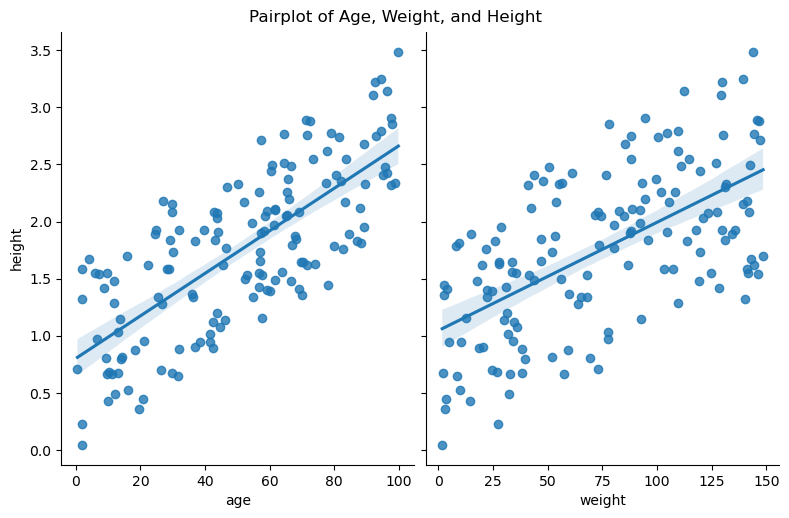

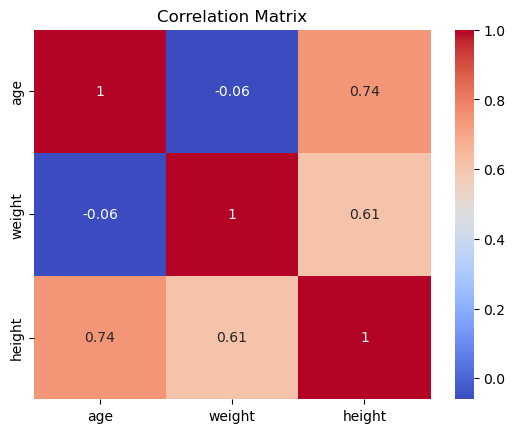

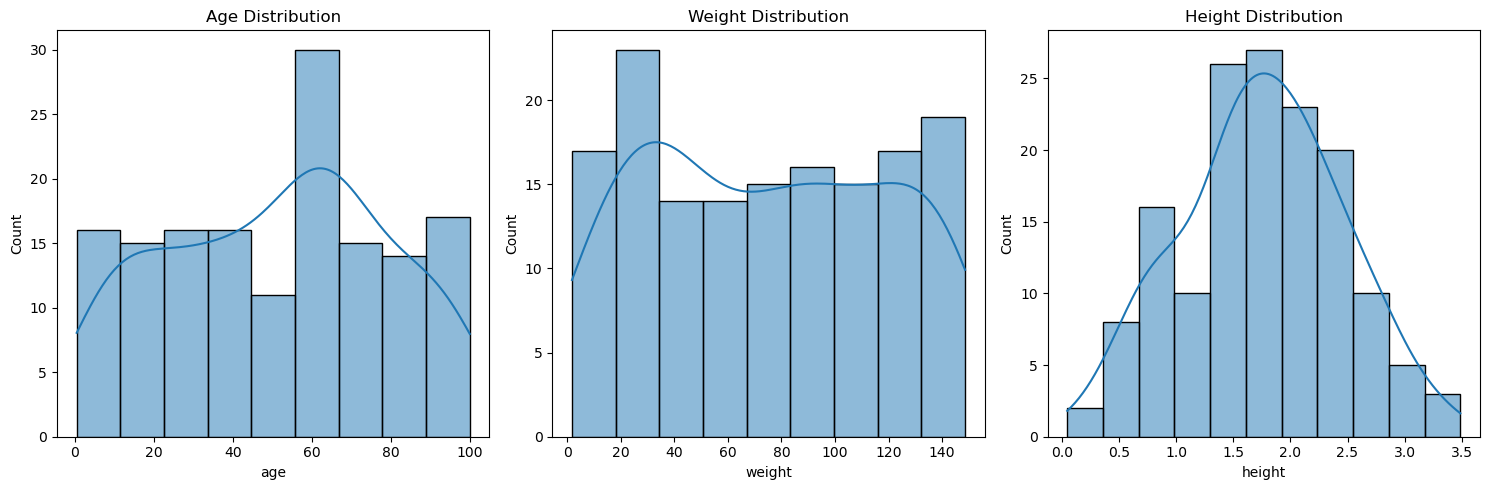

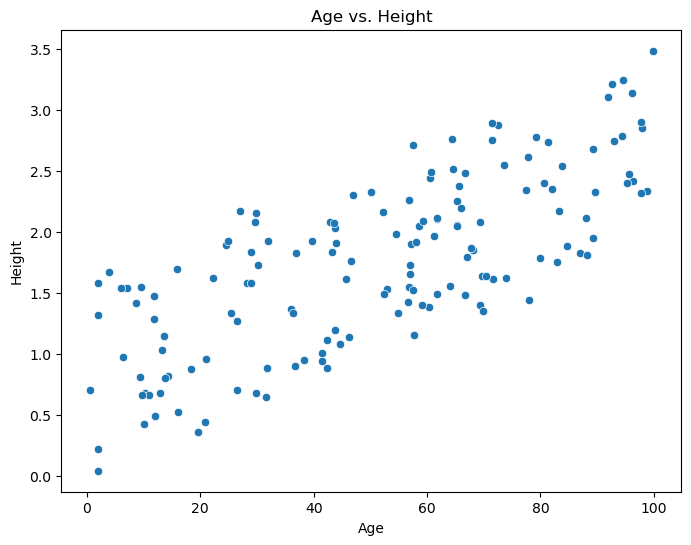

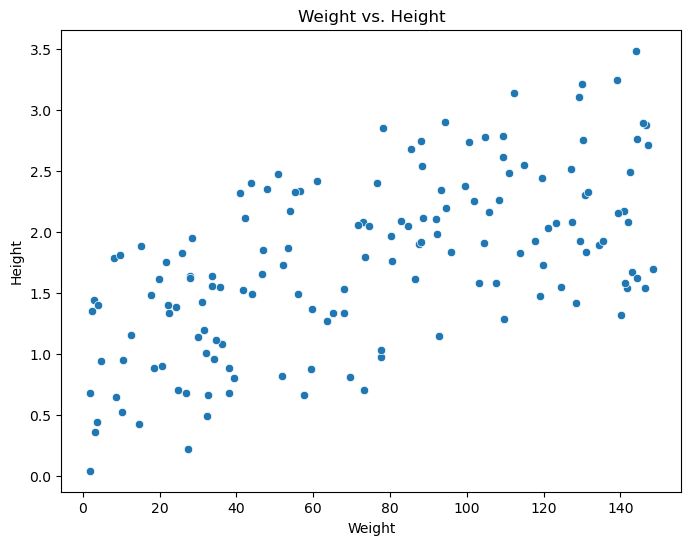

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between features and the label
sns.pairplot(data, x_vars=['age', 'weight'], y_vars='height', height=5, aspect=0.8, kind='reg')
plt.suptitle('Pairplot of Age, Weight, and Height', y=1.02)
plt.show()

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Histograms of features and label
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data['age'], kde=True, ax=axs[0])
axs[0].set_title('Age Distribution')

sns.histplot(data['weight'], kde=True, ax=axs[1])
axs[1].set_title('Weight Distribution')

sns.histplot(data['height'], kde=True, ax=axs[2])
axs[2].set_title('Height Distribution')

plt.tight_layout()
plt.show()

# Scatter plot of Age vs. Height
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='height', data=data)
plt.title('Age vs. Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()

# Scatter plot of Weight vs. Height
plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='height', data=data)
plt.title('Weight vs. Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Extract features and labels
X = data[['age', 'weight']].values
y = data['height'].values

# Preprocess the data: scale features by their standard deviation and set mean to zero
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Add a bias term (column of ones) to the features
X = np.c_[np.ones(X.shape[0]), X]

In [17]:
def gradient_descent(X, y, learning_rate, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient

    return theta, cost_history

In [19]:
learning_rates = [0.001, 0.005,0.01,0.05]
iterations = 1000
results = []

for lr in learning_rates:
    theta, cost_history = gradient_descent(X, y, lr, iterations)
    results.append((lr, theta, cost_history))

# Print results
for lr, theta, cost_history in results:
    print(f"Learning Rate: {lr}")
    print(f"Bias: {theta[0]}")
    print(f"Weights: {theta[1:]}")
    print(f"Number of iterations for convergence: {len(cost_history)}")
    print()

Learning Rate: 0.001
Bias: 1.1081079895321517
Weights: [0.33582296 0.27784547]
Number of iterations for convergence: 1000

Learning Rate: 0.005
Bias: 1.740829841993693
Weights: [0.54308757 0.4548556 ]
Number of iterations for convergence: 1000

Learning Rate: 0.01
Bias: 1.7524152039017133
Weights: [0.54780236 0.45913694]
Number of iterations for convergence: 1000

Learning Rate: 0.05
Bias: 1.7524908611182624
Weights: [0.5478434 0.4591759]
Number of iterations for convergence: 1000



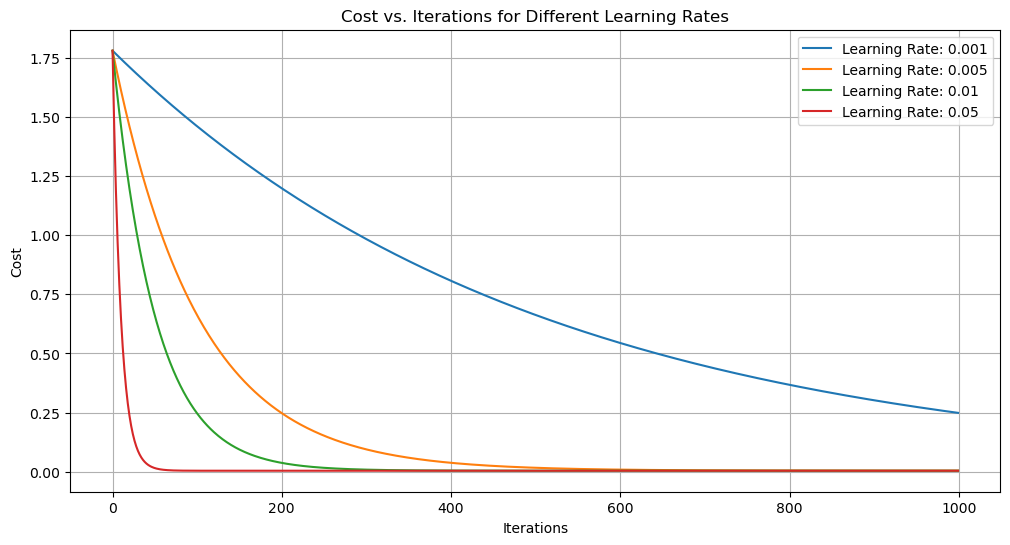

In [21]:
plt.figure(figsize=(12, 6))

for lr, theta, cost_history in results:
    plt.plot(range(iterations), cost_history, label=f'Learning Rate: {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

Converged early at iteration 615
Converged early at iteration 16
Learning Rate: 0.001
Bias: 1.1081079895321517
Weights: [0.33582296 0.27784547]
Number of iterations for convergence: 1000

Learning Rate: 0.005
Bias: 1.740829841993693
Weights: [0.54308757 0.4548556 ]
Number of iterations for convergence: 1000

Learning Rate: 0.01
Bias: 1.7488659243162654
Weights: [0.54626495 0.45772347]
Number of iterations for convergence: 616

Learning Rate: 0.5
Bias: 1.7524641202298807
Weights: [0.54782351 0.45915652]
Number of iterations for convergence: 17



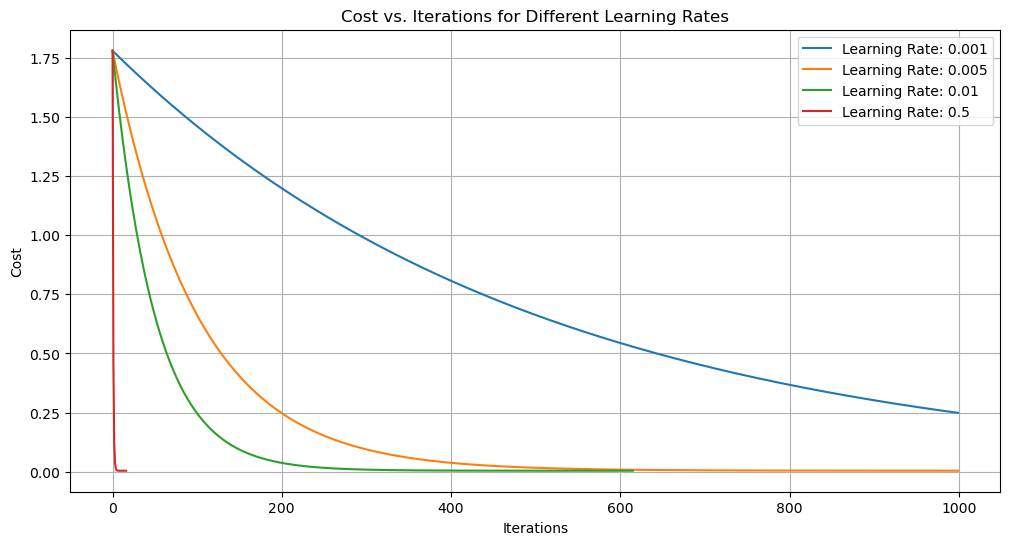

In [23]:
def gradient_descent(X, y, learning_rate, iterations, tolerance=1e-6, patience=5):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    best_cost = float('inf')
    patience_counter = 0

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

        if cost < best_cost - tolerance:
            best_cost = cost
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Converged early at iteration {i}")
                break

        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient

    return theta, cost_history

# Apply gradient descent with different learning rates
learning_rates = [0.001, 0.005,0.01,0.5]
iterations = 1000
results = []

for lr in learning_rates:
    theta, cost_history = gradient_descent(X, y, lr, iterations)
    results.append((lr, theta, cost_history))

# Print results
for lr, theta, cost_history in results:
    print(f"Learning Rate: {lr}")
    print(f"Bias: {theta[0]}")
    print(f"Weights: {theta[1:]}")
    print(f"Number of iterations for convergence: {len(cost_history)}")
    print()

# Visualize the results
plt.figure(figsize=(12, 6))

for lr, theta, cost_history in results:
    plt.plot(range(len(cost_history)), cost_history, label=f'Learning Rate: {lr}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.y_pred = self.sigmoid(self.z2)
        return self.y_pred

    def backward(self, X, y, y_pred):
        m = y.shape[0]

        # Compute gradients
        dz2 = y_pred - y
        dw2 = (1 / m) * np.dot(self.a1.T, dz2)
        db2 = (1 / m) * np.sum(dz2, axis=0)

        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dw1 = (1 / m) * np.dot(X.T, dz1)
        db1 = (1 / m) * np.sum(dz1, axis=0)

        return dw1, db1, dw2, db2

    def update_weights(self, dw1, db1, dw2, db2, learning_rate):
        self.W1 -= learning_rate * dw1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dw2
        self.b2 -= learning_rate * db2

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            dw1, db1, dw2, db2 = self.backward(X, y, y_pred)
            self.update_weights(dw1, db1, dw2, db2, learning_rate)
            if epoch % 100 == 0:
                loss = np.mean((y - y_pred) ** 2)
                print(f'Epoch {epoch}, Loss: {loss}')

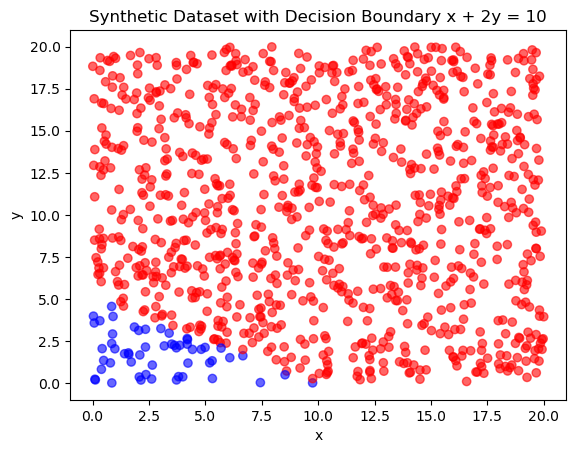

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
num_points = 1000

# Generate random points
X = np.random.rand(num_points, 2) * 20  # Scale to a reasonable range

# Define the decision boundary: x + 2y = 10
y = np.where(X[:, 0] + 2 * X[:, 1] > 10, 1, 0)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Dataset with Decision Boundary x + 2y = 10')
plt.show()

In [29]:
# Example usage
input_size = 2
hidden_size = 5
output_size = 1

nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
learning_rate = 0.01
epochs = 1000

nn.train(X, y.reshape(-1, 1), learning_rate, epochs)

Epoch 0, Loss: 0.25011245872038085
Epoch 100, Loss: 0.08837883581860226
Epoch 200, Loss: 0.053956753387200525
Epoch 300, Loss: 0.048686651226227576
Epoch 400, Loss: 0.04757579729307629
Epoch 500, Loss: 0.04734634534574001
Epoch 600, Loss: 0.04733954837684024
Epoch 700, Loss: 0.04738447124455655
Epoch 800, Loss: 0.0474314689902849
Epoch 900, Loss: 0.04746666731436075


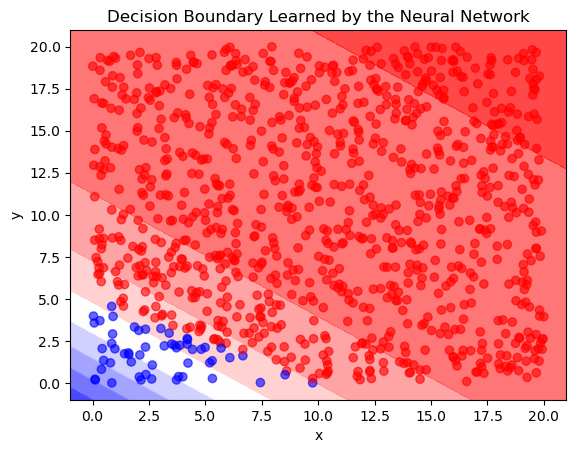

In [31]:
# Generate a grid of points to visualize the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the grid
Z = nn.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary Learned by the Neural Network')
plt.show()

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the target labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

ModuleNotFoundError: No module named 'tensorflow'

In [35]:
# Install TensorFlow (uncomment the line below if TensorFlow is not installed)
# !pip install tensorflow

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the target labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build a simple neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
try:
    import tensorflow as tf
except ImportError:
    # If TensorFlow is not installed, install it
    !pip install tensorflow
    import tensorflow as tf

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the target labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build a simple neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
def create_model(input_shape, hidden_size1, hidden_size2, output_size):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(hidden_size1, activation='tanh'),
        Dense(hidden_size2, activation='tanh'),
        Dense(output_size, activation='softmax')
    ])
    return model

In [ ]:
from tqdm.keras import TqdmCallback
# Define the neural network architecture
input_shape = (28, 28)
hidden_size1 = 10
hidden_size2 = 10
output_size = 10

# Create the model
model = create_model(input_shape, hidden_size1, hidden_size2, output_size)

# Train the neural network with different variations of gradient descent
learning_rate = 0.01
epochs = 10

# Batch Gradient Descent
print("Training with Batch Gradient Descent...")
model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
history_batch = model.fit(X_train, y_train, epochs=epochs, batch_size=X_train.shape[0], verbose=0, callbacks=[TqdmCallback(leave=True)])

# Stochastic Gradient Descent
print("Training with Stochastic Gradient Descent...")
model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
history_stochastic = model.fit(X_train, y_train, epochs=epochs, batch_size=1, verbose=0, callbacks=[TqdmCallback(leave=True)])

# Mini-Batch Gradient Descent
print("Training with Mini-Batch Gradient Descent...")
model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
history_mini_batch = model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0, callbacks=[TqdmCallback(leave=True)])

In [ ]:
# Plot the loss vs. number of iterations
plt.figure(figsize=(12, 6))
plt.plot(history_batch.history['loss'], label='Batch Gradient Descent')
plt.plot(history_stochastic.history['loss'], label='Stochastic Gradient Descent')
plt.plot(history_mini_batch.history['loss'], label='Mini-Batch Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from tqdm.keras import TqdmCallback

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the target labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Function to create the model
def create_model(input_shape, hidden_size1, hidden_size2, output_size):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(hidden_size1, activation='tanh'),
        Dense(hidden_size2, activation='tanh'),
        Dense(output_size, activation='softmax')
    ])
    return model

# Define the neural network architecture
input_shape = (28, 28)
hidden_size1 = 10
hidden_size2 = 10
output_size = 10

learning_rate = 0.01
epochs = 10

# Create separate models for each gradient descent method

# Batch Gradient Descent
print("Training with Batch Gradient Descent...")
model_batch = create_model(input_shape, hidden_size1, hidden_size2, output_size)
model_batch.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
history_batch = model_batch.fit(X_train, y_train, epochs=epochs, batch_size=X_train.shape[0], verbose=0, callbacks=[TqdmCallback(leave=True)])

# Stochastic Gradient Descent
print("Training with Stochastic Gradient Descent...")
model_stochastic = create_model(input_shape, hidden_size1, hidden_size2, output_size)
model_stochastic.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
history_stochastic = model_stochastic.fit(X_train, y_train, epochs=epochs, batch_size=1, verbose=0, callbacks=[TqdmCallback(leave=True)])

# Mini-Batch Gradient Descent
print("Training with Mini-Batch Gradient Descent...")
model_mini_batch = create_model(input_shape, hidden_size1, hidden_size2, output_size)
model_mini_batch.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
history_mini_batch = model_mini_batch.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0, callbacks=[TqdmCallback(leave=True)])

# Plot the loss vs. number of iterations
plt.figure(figsize=(12, 6))
plt.plot(history_batch.history['loss'], label='Batch Gradient Descent')
plt.plot(history_stochastic.history['loss'], label='Stochastic Gradient Descent')
plt.plot(history_mini_batch.history['loss'], label='Mini-Batch Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Sample dataset
np.random.seed(310)
X = np.random.randn(200, 3)
y = np.dot(X, np.array([1.5, -2.0, 1.0])) + np.random.randn(200) * 0.1
# Standardize the dataset
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# BGD: Batch Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, epochs=100):
W = np.random.randn(X.shape[1])
b = np.random.randn()
losses = []
for epoch in range(epochs):
y_pred = np.dot(X, W) + b
loss = np.mean((y_pred - y) ** 2)
losses.append(loss)
W -= learning_rate * np.dot(X.T, (y_pred - y)) / len(y)
b -= learning_rate * np.mean(y_pred - y)
return W, b, losses
# SGD: Stochastic Gradient Descent
def sgd(X, y, learning_rate=0.01, epochs=100):
W = np.random.randn(X.shape[1])
b = np.random.randn()
losses = []
for epoch in range(epochs):
for i in range(len(y)):
y_pred = np.dot(X[i], W) + b
loss = (y_pred - y[i]) ** 2
losses.append(loss)
W -= learning_rate * (y_pred - y[i]) * X[i]
b -= learning_rate * (y_pred - y[i])
return W, b, losses
# MBGD: Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.01, epochs=100, batch_size=20):
W = np.random.randn(X.shape[1])
b = np.random.randn()
losses = []
for epoch in range(epochs):
for i in range(0, len(y), batch_size):
X_batch = X[i:i+batch_size]
y_batch = y[i:i+batch_size]
y_pred = np.dot(X_batch, W) + b
loss = np.mean((y_pred - y_batch) ** 2)
losses.append(loss)
W -= learning_rate * np.dot(X_batch.T, (y_pred - y_batch)) / len(y_batch)
b -= learning_rate * np.mean(y_pred - y_batch)
return W, b, losses
# Training with different methods
methods = {
"BGD": gradient_descent,
"SGD": sgd,
"MBGD": mini_batch_gradient_descent
}
for method, func in methods.items():
W, b, losses = func(X, y, learning_rate=0.01, epochs=100)
plt.plot(losses, label=method)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()